<a href="https://colab.research.google.com/github/ccubc/DS_self_learning/blob/master/deep_learning/5_NLP_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised = True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [0]:
import numpy as np
train_data, test_data = imdb['train'], imdb['test']

In [0]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

# s and l are tensors, call numpy() to extract their values
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [5]:
training_sentences[0]

'b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\\xc3\\xa9, but he was a people\'s writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the story penned by a journalist rather than a novelist. It\'s not r

In [6]:
training_labels[0]

1

In [0]:
# turn into numpy arrays
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
# tokenize the sentences
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, truncating = trunc_type)

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b oh yeah jenna jameson did it again yeah baby this movie rocks it was one of the 1st movies i saw of her and i have to say i feel in love with her she was great in this move br br her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing br br i hope this comment helps and u can buy the movie the storyline is awesome is very unique and i'm sure u are going to like it jenna amazed us once more and no wonder the movie won so many
b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the

In [0]:
# add an embedding layer
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
      tf.keras.layers.Flatten(),
      # the above line could be substituted with:
      # tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(6, activation = 'relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs = num_epochs, validation_data = (testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 8s 331us/sample - loss: 0.5059 - accuracy: 0.7292 - val_loss: 0.3890 - val_accuracy: 0.8261
Epoch 2/10
25000/25000 [==============================] - 6s 243us/sample - loss: 0.2436 - accuracy: 0.9054 - val_loss: 0.4098 - val_accuracy: 0.8200
Epoch 3/10
25000/25000 [==============================] - 6s 238us/sample - loss: 0.0950 - accuracy: 0.9758 - val_loss: 0.5136 - val_accuracy: 0.8073
Epoch 4/10
25000/25000 [==============================] - 6s 236us/sample - loss: 0.0256 - accuracy: 0.9966 - val_loss: 0.6304 - val_accuracy: 0.7998
Epoch 5/10
25000/25000 [==============================] - 6s 244us/sample - loss: 0.0072 - accuracy: 0.9993 - val_loss: 0.6798 - val_accuracy: 0.8062
Epoch 6/10
25000/25000 [==============================] - 6s 237us/sample - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.7335 - val_accuracy: 0.8084
Epoch 7/10
25000/25000 [==========================

signs of overfitting

In [14]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

In [17]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

MessageError: ignored

In [18]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)

[[11], [], [1430], [968], [4], [1537], [1537], [4738], [], [790], [2015], [11], [2922], [2191], [], [790], [2015], [11], [579], [], [11], [579], [], [4], [1783], [4], [4508], [11], [2922], [1277], [], [], [2015], [1005], [2922], [968], [579], [790], []]


### TensorFlow Embedding Projector
projector.tensorflow.org, load data, upload the vecs.tsv and meta.tsv

## The Sarcasm Dataset
Load the dataset and preprocess, as in previous notebook, we will then do sentiment analysis with it.

In [20]:
import json
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O /tmp/sarcasm.json

--2020-01-03 23:25:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-01-03 23:25:00 (134 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000   # dataset has ~ 27000 records in total

with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [0]:

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, 
                                padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, 
                               padding = padding_type, truncating = trunc_type)


In [26]:
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(24, activation = 'relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [28]:
num_epochs = 30

history = model.fit(np.array(training_padded), np.array(training_labels), epochs = num_epochs,
                    validation_data = (np.array(testing_padded), np.array(testing_labels)), verbose = 2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 3s - loss: 0.5550 - accuracy: 0.7063 - val_loss: 0.3949 - val_accuracy: 0.8346
Epoch 2/30
20000/20000 - 3s - loss: 0.3066 - accuracy: 0.8769 - val_loss: 0.3428 - val_accuracy: 0.8548
Epoch 3/30
20000/20000 - 3s - loss: 0.2276 - accuracy: 0.9110 - val_loss: 0.3469 - val_accuracy: 0.8535
Epoch 4/30
20000/20000 - 3s - loss: 0.1817 - accuracy: 0.9310 - val_loss: 0.3793 - val_accuracy: 0.8463
Epoch 5/30
20000/20000 - 3s - loss: 0.1505 - accuracy: 0.9445 - val_loss: 0.4088 - val_accuracy: 0.8457
Epoch 6/30
20000/20000 - 3s - loss: 0.1257 - accuracy: 0.9556 - val_loss: 0.4433 - val_accuracy: 0.8453
Epoch 7/30
20000/20000 - 3s - loss: 0.1073 - accuracy: 0.9635 - val_loss: 0.4845 - val_accuracy: 0.8411
Epoch 8/30
20000/20000 - 3s - loss: 0.0919 - accuracy: 0.9690 - val_loss: 0.5419 - val_accuracy: 0.8346
Epoch 9/30
20000/20000 - 3s - loss: 0.0788 - accuracy: 0.9739 - val_loss: 0.5936 - val_accuracy: 0.8320
Epoch 10/30
200

#### Plot the result after training

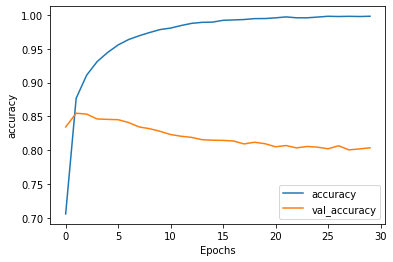

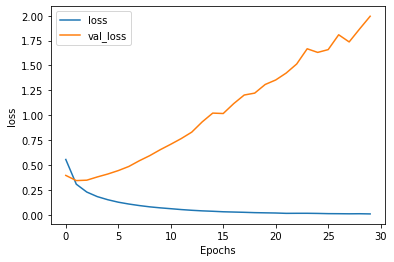

In [31]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### About the loss function (as a confidence in the prediction)

While the number of accurate predictions increased over time, the confidence per prediction effectively decreased.

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 2s - loss: 0.5149 - accuracy: 0.7408 - val_loss: 0.4097 - val_accuracy: 0.8104
Epoch 2/30
20000/20000 - 2s - loss: 0.3785 - accuracy: 0.8277 - val_loss: 0.3998 - val_accuracy: 0.8171
Epoch 3/30
20000/20000 - 2s - loss: 0.3638 - accuracy: 0.8349 - val_loss: 0.4109 - val_accuracy: 0.8122
Epoch 4/30
20000/20000 - 2s - loss: 0.3590 - accuracy: 0.8342 - val_loss: 0.4120 - val_accuracy: 0.8116
Epoch 5/30
20000/20000 - 2s - loss: 0.3562 - accuracy: 0.8350 - val_loss: 0.4049 - val_accuracy: 0.8094
Epoch 6/30
20000/20000 - 2s - loss: 0.3537 - accuracy: 0.8395 - val_loss: 0.4043 - val_accuracy: 0.8125
Epoch 7/30
20000/20000 - 2s - loss: 0.3531 - accuracy: 0.8411 - val_loss: 0.4082 - val_accuracy: 0.8140
Epoch 8/30
20000/20000 - 2s - loss: 0.3524 - accuracy: 0.8385 - val_loss: 0.4050 - val_accuracy: 0.8128
Epoch 9/30
20000/20000 - 2s - loss: 0.3509 - accuracy: 0.8406 - val_loss: 0.4078 - val_accuracy: 0.8141
Epoch 10/30
200

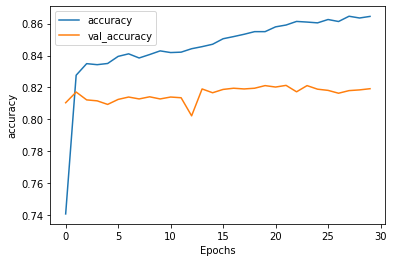

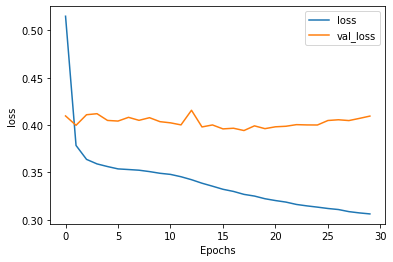

In [33]:
# change hyperparameter and explore a bit on the loss and accuracy.
# e.g. decrease vocabulary size from 10000 to 1000

vocab_size = 1000 # was 10000
max_length = 16 # was 32
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, 
                                padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, 
                               padding = padding_type, truncating = trunc_type)
num_epochs = 30
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(24, activation = 'relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(np.array(training_padded), np.array(training_labels), epochs = num_epochs,
                    validation_data = (np.array(testing_padded), np.array(testing_labels)), verbose = 2)

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#### Deriable: high accuracy + loss function does not increase sharply

## BBC dataset

In [51]:
import csv

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-01-04 00:31:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2020-01-04 00:31:12 (169 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [53]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))


153


In [54]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    bbcreader = csv.reader(csvfile, delimiter=",")
    next(bbcreader)
    for row in bbcreader:
        labels.append(row[0])

        sentence = ""
        for word in row[1].split():
            if word not in stopwords:
                sentence += word + " "        
        sentences.append(sentence.strip())


print(len(labels))
print(len(sentences))
print(sentences[0])


2225
2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cab

In [57]:
train_size = int(len(sentences)*training_portion)

train_sentences = sentences[0:train_size]
train_labels = labels[0:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [89]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences
                                              )
train_padded = pad_sequences(train_sequences, padding = padding_type, maxlen = max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
120
200
120
192
120


In [90]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences
                                              )
validation_padded = pad_sequences(validation_sequences, padding = padding_type, maxlen = max_length)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [91]:
label_tokenizer = Tokenizer()

label_tokenizer.fit_on_texts(labels)

training_label_seq = label_tokenizer.texts_to_sequences(train_labels)
validation_label_seq = label_tokenizer.texts_to_sequences(validation_labels)

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(len(training_label_seq))

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(len(validation_label_seq))

[4]
[2]
[1]
1780
[5]
[4]
[3]
445


In [92]:
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(24, activation = 'relu'),
      tf.keras.layers.Dense(6, activation = 'softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_11  (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [93]:
num_epochs = 30
history = model.fit(train_padded, np.array(training_label_seq), epochs = num_epochs,
                    validation_data = (validation_padded, np.array(validation_label_seq)), verbose = 2)


Train on 1780 samples, validate on 445 samples
Epoch 1/30
1780/1780 - 1s - loss: 1.7676 - accuracy: 0.3646 - val_loss: 1.7366 - val_accuracy: 0.4045
Epoch 2/30
1780/1780 - 0s - loss: 1.6900 - accuracy: 0.4354 - val_loss: 1.6347 - val_accuracy: 0.4539
Epoch 3/30
1780/1780 - 0s - loss: 1.5614 - accuracy: 0.4506 - val_loss: 1.4883 - val_accuracy: 0.4584
Epoch 4/30
1780/1780 - 0s - loss: 1.3732 - accuracy: 0.4539 - val_loss: 1.2854 - val_accuracy: 0.4831
Epoch 5/30
1780/1780 - 0s - loss: 1.1580 - accuracy: 0.5517 - val_loss: 1.0931 - val_accuracy: 0.6764
Epoch 6/30
1780/1780 - 0s - loss: 0.9691 - accuracy: 0.7444 - val_loss: 0.9324 - val_accuracy: 0.7326
Epoch 7/30
1780/1780 - 0s - loss: 0.8103 - accuracy: 0.8455 - val_loss: 0.7949 - val_accuracy: 0.8449
Epoch 8/30
1780/1780 - 0s - loss: 0.6736 - accuracy: 0.9079 - val_loss: 0.6808 - val_accuracy: 0.8629
Epoch 9/30
1780/1780 - 0s - loss: 0.5567 - accuracy: 0.9174 - val_loss: 0.5784 - val_accuracy: 0.8764
Epoch 10/30
1780/1780 - 0s - loss: 

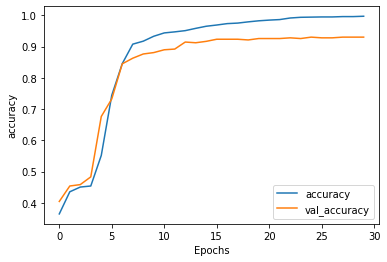

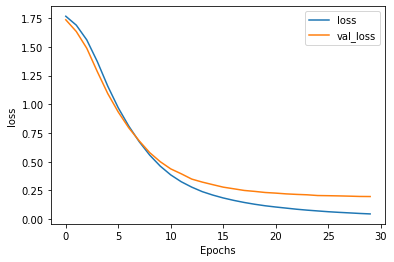

In [94]:

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [96]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(1000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')